### Mini batch Task
- 다이아몬드의 특성을 회귀분석하여, 예상 가격을 예측한다.

In [1]:
import pandas as pd

d_df = pd.read_csv('./datasets/diamond.csv')
d_df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [3]:
pre_d_df = d_df.drop(labels=['Unnamed: 0'], axis=1)
pre_d_df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [5]:
columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
pre_d_df = pre_d_df.loc[:, columns]

In [8]:
pre_d_df.corr()['price'].sort_values(ascending=False)[1:]

carat    0.921591
x        0.884433
y        0.865419
z        0.861249
table    0.127118
depth   -0.010630
Name: price, dtype: float64

In [11]:
pre_d_df['target'] = pre_d_df.price
pre_d_df = pre_d_df.drop(labels=['price'], axis=1)
pre_d_df

,carat,depth,table,x,y,z,target
0,0.23,61.5,55.0,3.95,3.98,2.43,326
1,0.21,59.8,61.0,3.89,3.84,2.31,326
2,0.23,56.9,65.0,4.05,4.07,2.31,327
3,0.29,62.4,58.0,4.20,4.23,2.63,334
4,0.31,63.3,58.0,4.34,4.35,2.75,335
...,...,...,...,...,...,...,...
53938,0.86,61.0,58.0,6.15,6.12,3.74,2757
53939,0.75,62.2,55.0,5.83,5.87,3.64,2757
53940,0.71,60.5,55.0,5.79,5.74,3.49,2756
53941,0.71,59.8,62.0,5.74,5.73,3.43,2756


<Axes: >

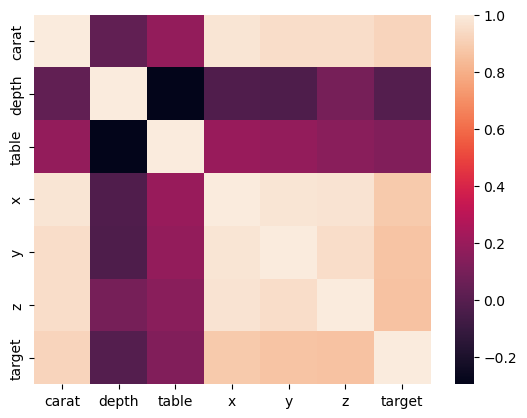

In [12]:
import seaborn as sns

sns.heatmap(pre_d_df.corr())

### OLS (Ordinary Least Square)
- 최소제곱법, 또는 최소자승법, 최소제곱근사법, 최소자승근사법을 의미하는 기술로서, 가장 근접한 해를 구하는 방식이다.
- 선형 회귀 모델을 평가하는 데 유용한 방법이며, 모델 전체와 모델의 각 feature에 대한 통계적 성능 지표를 사용하여 수행된다.
- 다양한 유형의 통계 모델을 추정하고 통계 테스트를 수행하는 클래스 여러 개와 기능을 제공한다.
- 관측된 데이터에 선형 방정식을 적용해서 생성되며, 가장 일반적인 방법이다.
- P > |t| (p-value): 해당 독립 변수가 0.05보다 작으면 종속 변수에 영향을 미치는 것이 유의미하다라는 것을 뜻한다.
- Durbin-Watson: 보통 1.5에서 2.5사이라면, 독립으로 판단하고 회귀 모형이 적합하다는 것을 의미한다.
- R<sup>2</sup>값을 유지 또는 개선하는 방향으로만 수행해야 한다.

In [19]:
import statsmodels.api as sm

features, targets = pre_d_df.iloc[:, 0:2], pre_d_df.target

print(sm.OLS(targets, features).fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                 target   R-squared (uncentered):                   0.924
Model:                            OLS   Adj. R-squared (uncentered):              0.924
Method:                 Least Squares   F-statistic:                          3.279e+05
Date:                Fri, 26 Apr 2024   Prob (F-statistic):                        0.00
Time:                        11:44:54   Log-Likelihood:                     -4.7261e+05
No. Observations:               53943   AIC:                                  9.452e+05
Df Residuals:                   53941   BIC:                                  9.452e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### VIF (Variance Inflation Factor)
- 분산 팽창 요인 수치가 5 또는 10 이상일 경우 다중 공선성의 문제가 있다는 뜻이다.
- 전체적으로 5를 넘어가면 10 이상을 판단한다.
- 다중 공선성(Multicollinearity)이란 회귀 분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제를 뜻한다.  

<img src="./images/multicollinearity.png">

In [23]:
features.values

array([[ 0.23, 61.5 ],
       [ 0.21, 59.8 ],
       [ 0.23, 56.9 ],
       ...,
       [ 0.71, 60.5 ],
       [ 0.71, 59.8 ],
       [ 0.7 , 60.5 ]])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def feature_engineering_VIF(features):
    vif = pd.DataFrame()
    vif['score'] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
    vif['feature'] = features.columns
    return vif

In [24]:
display(feature_engineering_VIF(features))

,score,feature
0,3.836537,carat
1,3.836537,depth


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

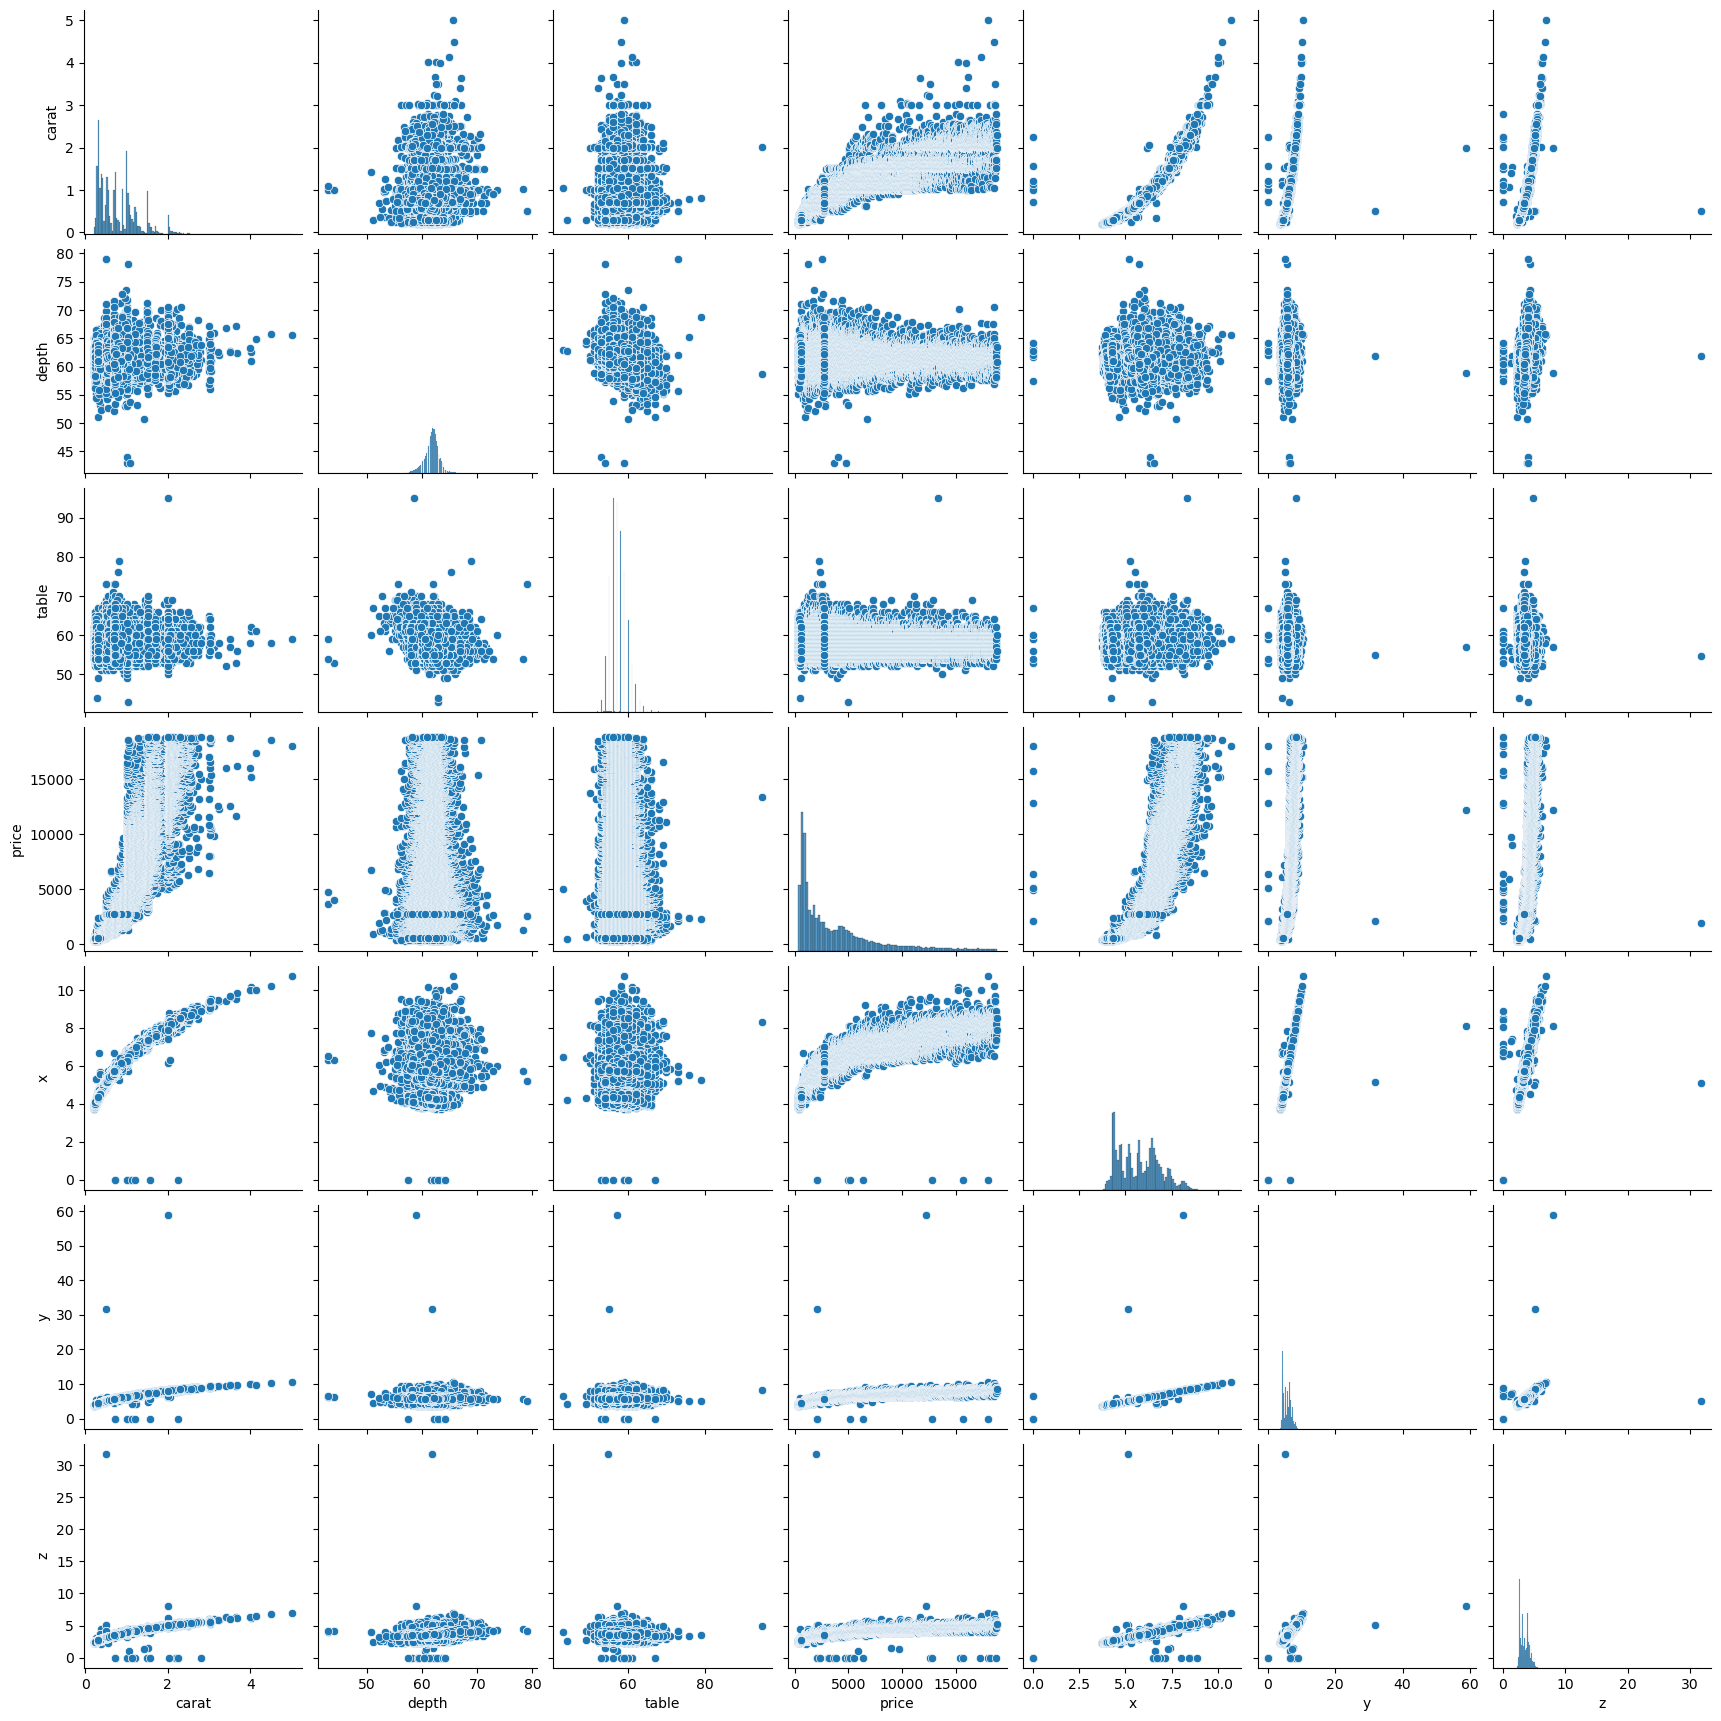

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

sns.pairplot(d_df[columns])
plt.show()